In [127]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.7.1+cpu
0.22.1+cpu


In [128]:
train_data = datasets.FashionMNIST(
    root="data", # Where to download data to?
    train=True,  # Do we want the training dataset?
    download = True,  #Do we want to download it?
    transform=ToTensor(), # How do we transform the data?
    target_transform=None  # How do we transform the labels/targets?
)
test_data = datasets.FashionMNIST(
    root="data", # Where to download data to?
    train=False,  # Do we want the training dataset?
    download = True,  #Do we want to download it?
    transform=ToTensor(), # How do we transform the data?
    target_transform=None  # How do we transform the labels/targets?
)

In [129]:
len(train_data), len(test_data)

(60000, 10000)

In [130]:
image, label = train_data[0]

In [131]:
class_names = train_data.classes
class_names
# ['T-shirt/top',
#  'Trouser',
#  'Pullover',
#  'Dress',
#  'Coat',
#  'Sandal',
#  'Shirt',
#  'Sneaker',
#  'Bag',
#  'Ankle boot']

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [132]:
class_to_idx = train_data.class_to_idx
class_to_idx
# {'T-shirt/top': 0,
#  'Trouser': 1,
#  'Pullover': 2,
#  'Dress': 3,
#  'Coat': 4,
#  'Sandal': 5,
#  'Shirt': 6,
#  'Sneaker': 7,
#  'Bag': 8,
#  'Ankle boot': 9}   returns a dict with class and index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [133]:
image.shape, label
print(f"Image shape: {image.shape} -> [color channels, height, width]")
print(f"Label shape: {class_names[label]}")
# Image shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
# Label shape: Ankle boot

Image shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
Label shape: Ankle boot


Text(0.5, 1.0, '9')

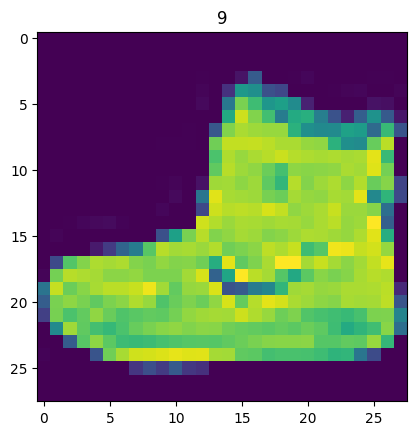

In [134]:
# Visualizing our data
# matplotlib expects [H, W, C] while our data is in [C, H, W]
# However, since our image is greyscale and C is 1, we can
# Squeeze it out
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

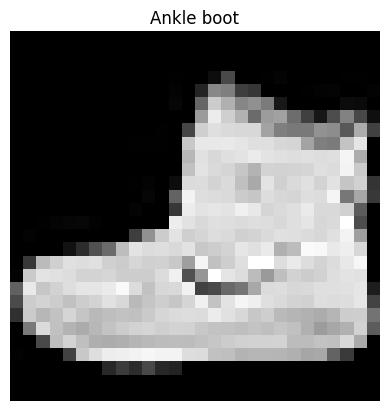

In [135]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis('off')

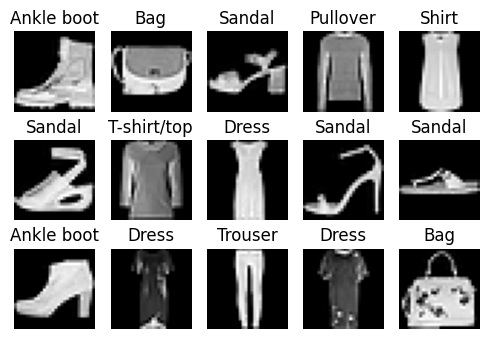

In [136]:
# Plot more images
torch.manual_seed(45)
fig = plt.figure(figsize=(6,4))
rows, cols = 3,5
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [137]:
from torch.utils.data import DataLoader

# Setup batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
# It is usually easier to test data if it is NOT shuffled around
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

# Lets check out what we made
print(f'Dataloaders: {train_dataloader, test_dataloader}')
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE} batches")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE} batches")
# Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000002CF001D4920>, <torch.utils.data.dataloader.DataLoader object at 0x000002CF78112C30>)
# Length of train_dataloader: 1875 batches of 32 batches
# Length of test_dataloader: 313 batches of 32 batches

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000016C57057B00>, <torch.utils.data.dataloader.DataLoader object at 0x0000016C56AA0B90>)
Length of train_dataloader: 1875 batches of 32 batches
Length of test_dataloader: 313 batches of 32 batches


In [138]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape
#(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 0, label size: torch.Size([])


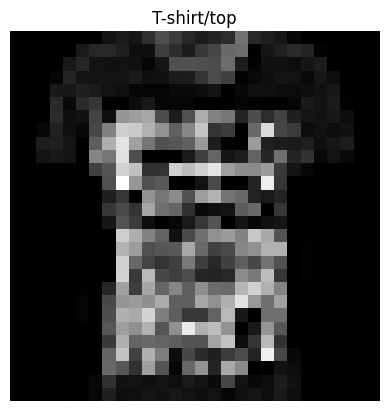

In [139]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")
# Image size: torch.Size([1, 28, 28])
# Label: 0, label size: torch.Size([])

In [140]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flattehn sample
output = flatten_model(x)

print(f'Shape before flattening: {x.shape}')
print(f'Shape after flattening: {output.shape}')
# Shape before flattening: torch.Size([1, 28, 28])
# Shape after flattening: torch.Size([1, 784])

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [141]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        # shapes are immediately flattened and passed through two linear layers
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape,
                      out_features = hidden_units),
            nn.Linear(in_features = hidden_units,
                      out_features = output_shape)
        )

    def forward(self,x):
        return self.layer_stack(x)

In [142]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 28*28,  # 28 x 28
    hidden_units = 10, # how many units in hidden layer
    output_shape = len(class_names) # one for every class
).to('cpu')
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [143]:
dummy_x = torch.rand([1,1,28,28]) # Batch one, color channel 1, 28x28
print(model_0(dummy_x))
# tensor([[-0.1747,  0.2848,  0.0754, -0.1747,  0.4594,  0.1398,  0.4141,  0.2572,
#          -0.2044, -0.0451]], grad_fn=<AddmmBackward0>)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)


In [144]:
import helper_functions #import from Learn PyTorch repo
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001)

In [145]:
device = 'gpu' if torch.cuda.is_available() else 'gpu'

In [146]:
# Creating a function to time our model
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [147]:
start_time = timer()

end_time = timer()
print_train_time(start_time, end_time, 'cpu')
# Train time on cpu: 0.000 seconds
# 2.880000010918593e-05

Train time on cpu: 0.000 seconds


1.720000000204891e-05

In [148]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:06<00:13,  6.66s/it]


Train loss: 1.93787 | Test loss: 1.54349, Test acc: 62.42%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:13<00:06,  6.48s/it]


Train loss: 1.24920 | Test loss: 1.06094, Test acc: 66.15%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:19<00:00,  6.46s/it]


Train loss: 0.95073 | Test loss: 0.89137, Test acc: 70.00%

Train time on cpu: 19.373 seconds


In [149]:
# Make predictions and get model_0 results
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device):
    # Returns a dictionary containing the results of model predicting on dataloader
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)
            # Accumulate loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        # Scale loss and acc to find avg loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model
                                                    # was created in a class
            "model_loss": loss.item(),
            "model_acc": acc}

model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device=device)
model_0_results
# {'model_name': 'FashionMNISTModelV0',
#  'model_loss': 0.5980282425880432,
#  'model_acc': 79.56269968051119}

100%|██████████| 313/313 [00:00<00:00, 411.84it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.8913663625717163,
 'model_acc': 69.99800319488818}

In [150]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape,
                      out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units,
                      out_features = output_shape),
            nn.ReLU()
        )
    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)

In [151]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

In [152]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

In [153]:
# Lets functionize it
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0,0
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch
        train_acc += accuracy_fn(y_true = y,
                                 y_pred = y_pred.argmax(dim=1))
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        # 4. Loss backward
        loss.backward()
        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss and acc by length of data loader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [154]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X,y = X.to(device), y.to(device)
            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [155]:
torch.manual_seed(42)
test_time_start_on_gpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    # Training loop
    train_step(model = model_1,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device=device)
    # Testing loop
    test_step(model = model_1,
              data_loader = test_dataloader,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn,
              device=device)
test_time_end_on_gpu = timer()
total_test_time_model_1 = print_train_time(start=test_time_start_on_gpu,
                                           end=test_time_end_on_gpu,
                                           device=device)
# Epoch: 0
# Test loss: 0.95637 | Test acc: 65.00%
# Epoch: 1
# Test loss: 0.72227 | Test acc: 73.91%
# Epoch: 2
# Test loss: 0.68500 | Test acc: 75.02%

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 1.09199 | Train acc: 61.34%


 33%|███▎      | 1/3 [00:06<00:13,  6.59s/it]

Test loss: 0.95637 | Test acc: 65.00%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.78101 | Train acc: 71.93%


 67%|██████▋   | 2/3 [00:13<00:06,  6.59s/it]

Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.67027 | Train acc: 75.94%


100%|██████████| 3/3 [00:19<00:00,  6.53s/it]

Test loss: 0.68500 | Test acc: 75.02%

Train time on cpu: 19.597 seconds


In [156]:
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device=device)
model_1_results, model_0_results
# ({'model_name': 'FashionMNISTModelV1',
#   'model_loss': 0.6850008964538574,
#   'model_acc': 75.01996805111821},
#  {'model_name': 'FashionMNISTModelV0',
#   'model_loss': 0.8913663625717163,
#   'model_acc': 69.99800319488818})

100%|██████████| 313/313 [00:00<00:00, 391.74it/s]


({'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.6850008964538574,
  'model_acc': 75.01996805111821},
 {'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.8913663625717163,
  'model_acc': 69.99800319488818})

In [157]:
class FashionMNISTModelV2(nn.Module):
    """ Model architecture that replicates the TinyVGG
    model from the CNN explainer website"""
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1
                      ),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )  # This represents just one conv block in a NN
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )  # Block 2
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units * 7 * 7,
                      out_features = output_shape
                      )
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

In [158]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1,  # Color channels
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)
# color channels

In [159]:
# Stepping through nn.Conv2d()
torch.manual_seed(42)
# Create a batch of random images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f'Image batch shape: {images.shape}')
print(f'Single image shape: {test_image.shape}')
print(f'Test image:\n{test_image}')

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [160]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 64,
                       kernel_size = (5,5), #sliding window of 3x3 over the image
                       stride = 1,
                       padding = 2) # number of cells out from the edge we can go
# Pass the data through the convolutional layter
conv_output = conv_layer(test_image)
conv_output.shape
#torch.Size([10, 64, 64])

torch.Size([64, 64, 64])

In [161]:
# Stepping through nn.MaxPool2d
print(f'Test image original shape: {test_image.shape}')
print(f'Test image with unsqeueezed dimension: {test_image.unsqueeze(0).shape}')

# Create a sample MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f"Shape after going through conv_layer: {test_image_through_conv.shape}")

# Pass data from the convolutional through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f'Shape after going through conv layer and max pool layer: {test_image_through_conv_and_max_pool.shape}')
# Test image original shape: torch.Size([3, 64, 64])
# Test image with unsqeueezed dimension: torch.Size([1, 3, 64, 64])
# Shape after going through conv_layer: torch.Size([1, 64, 64, 64])
# Shape after going through conv layer and max pool layer: torch.Size([1, 64, 32, 32])

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqeueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer: torch.Size([1, 64, 64, 64])
Shape after going through conv layer and max pool layer: torch.Size([1, 64, 32, 32])


In [162]:
torch.manual_seed(42)
# Create another random tensor with  similar dimension to our image to test
random_tensor = torch.rand(size=(1,1,2,2))
print(f'random_tensor: {random_tensor}')
print(f'random_tensor shape: {random_tensor.shape}')

max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f"Max Pool tensor: {max_pool_tensor}")
print(f'Max pool tensor shape: {max_pool_tensor.shape}')

random_tensor: tensor([[[[0.8823, 0.9150],
          [0.3829, 0.9593]]]])
random_tensor shape: torch.Size([1, 1, 2, 2])
Max Pool tensor: tensor([[[[0.9593]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


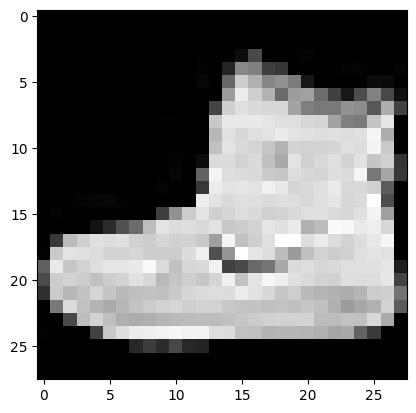

In [163]:
plt.imshow(image.squeeze(), cmap='gray')

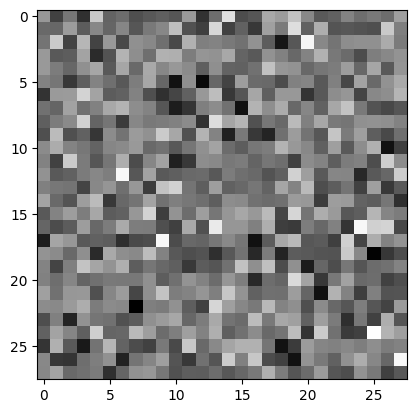

In [164]:
# Declare a random tensor of the same size as our images
rand_image_tensor = torch.randn(size=(1,28,28))
plt.imshow(rand_image_tensor.squeeze(), cmap='gray')

In [165]:
print(model_2(rand_image_tensor.unsqueeze(0).to(device)))
# torch.Size([1, 10, 14, 14])
# torch.Size([1, 10, 7, 7])
# torch.Size([1, 10])
# tensor([[ 0.0403, -0.0905,  0.0655, -0.0386,  0.0060,  0.0168,  0.0116,  0.0094,
#          -0.0144, -0.0078]], grad_fn=<AddmmBackward0>)

tensor([[ 0.0403, -0.0905,  0.0655, -0.0386,  0.0060,  0.0168,  0.0116,  0.0094,
         -0.0144, -0.0078]], grad_fn=<AddmmBackward0>)


In [166]:
# Setup a loss function and optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

In [167]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Measure Time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n----')
    train_step(model = model_2,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)
    test_step(model = model_2,
              data_loader = test_dataloader,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn,
              device = device)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(train_time_start_model_2, train_time_end_model_2, device=device)
# Epoch: 0
# Test loss: 0.40317 | Test acc: 85.76%
# Epoch: 1
# Test loss: 0.34778 | Test acc: 87.11%
# Epoch: 2
# Test loss: 0.31492 | Test acc: 88.69%

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.58819 | Train acc: 78.67%


 33%|███▎      | 1/3 [00:17<00:35, 17.89s/it]

Test loss: 0.40317 | Test acc: 85.76%

Epoch: 1
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.36085 | Train acc: 86.94%


 67%|██████▋   | 2/3 [00:37<00:19, 19.16s/it]

Test loss: 0.34778 | Test acc: 87.11%

Epoch: 2
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.32424 | Train acc: 88.19%


100%|██████████| 3/3 [00:57<00:00, 19.26s/it]

Test loss: 0.31492 | Test acc: 88.69%

Train time on cpu: 57.788 seconds


In [168]:
model_2_results = eval_model(
    model = model_2,
    data_loader = train_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)
model_2_results
# {'model_name': 'FashionMNISTModelV2',
#  'model_loss': 0.2876949906349182,
#  'model_acc': 89.55}

100%|██████████| 1875/1875 [00:08<00:00, 215.25it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2876949906349182,
 'model_acc': 89.55}

In [169]:
# Comparing results and training time across experiments
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results
#  model_name              model_loss          model_acc
# 0,FashionMNISTModelV0,0.8913663625717163,69.99800319488818
# 1,FashionMNISTModelV1,0.6850008964538574,75.01996805111821
# 2,FashionMNISTModelV2,0.2876949906349182,89.55


,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.891366,69.998003
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.287695,89.550000


In [170]:
# Add training time to results comparison
compare_results['Training_time'] = [total_train_time_model_0,
                                    total_test_time_model_1,
                                    total_train_time_model_2]
compare_results
# 19.373129
# 19.596952
# 57.787808

,model_name,model_loss,model_acc,Training_time
0,FashionMNISTModelV0,0.891366,69.998003,19.373129
1,FashionMNISTModelV1,0.685001,75.019968,19.596952
2,FashionMNISTModelV2,0.287695,89.550000,57.787808


Text(0, 0.5, 'Model')

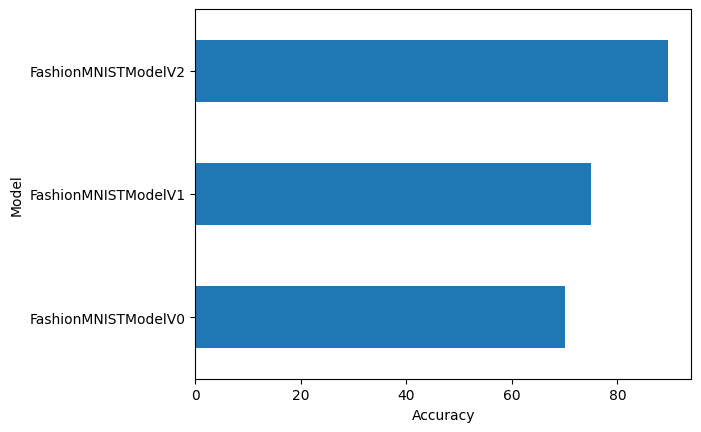

In [171]:
# Visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('Accuracy')
plt.ylabel('Model')

In [172]:
# Make and evaluate random predictions with best model
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Add a batch dimension
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probabilities
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())
    #Stack the pred_probs to turn list into tensor
    return torch.stack(pred_probs)

In [236]:
import random
random.seed(42)
test_samples = []
test_labels = []
# Recall that test_data is our testing data declared at the start
# We also made a dataloader for it with batch size = batch size
for sample, label in random.sample(list(test_data), k = 9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape, test_labels[0]
#(torch.Size([1, 28, 28]), 5)

(torch.Size([1, 28, 28]), 5)

Text(0.5, 1.0, 'Sandal')

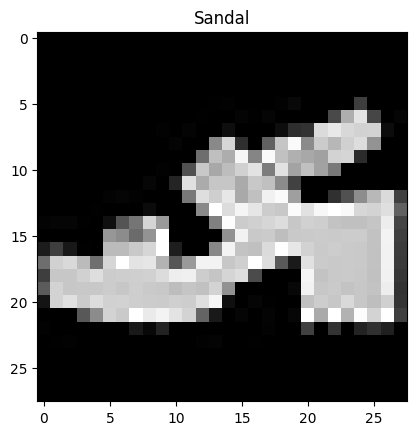

In [237]:
# Plot our first sample in the test set
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [238]:
pred_probs = make_predictions(model_2, test_samples, device)
pred_probs[:2]
# 0.00000,0.00000,0.00000,0.00000,0.00000,0.99982,0.00000,0.00002,0.00002,0.00014
# 0.02280,0.67606,0.00085,0.09904,0.05878,0.00011,0.14036,0.00028,0.00054,0.00119


tensor([[1.9760e-07, 1.0548e-07, 1.3250e-07, 9.2053e-07, 9.9930e-08, 9.9982e-01,
         4.8932e-07, 1.7345e-05, 1.8923e-05, 1.4102e-04],
        [2.2797e-02, 6.7606e-01, 8.4893e-04, 9.9038e-02, 5.8776e-02, 1.1199e-04,
         1.4036e-01, 2.7557e-04, 5.4492e-04, 1.1890e-03]])

In [239]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes, test_labels
# (tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]), [5, 1, 7, 4, 3, 0, 4, 7, 1])

(tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]), [5, 1, 7, 4, 3, 0, 4, 7, 1])

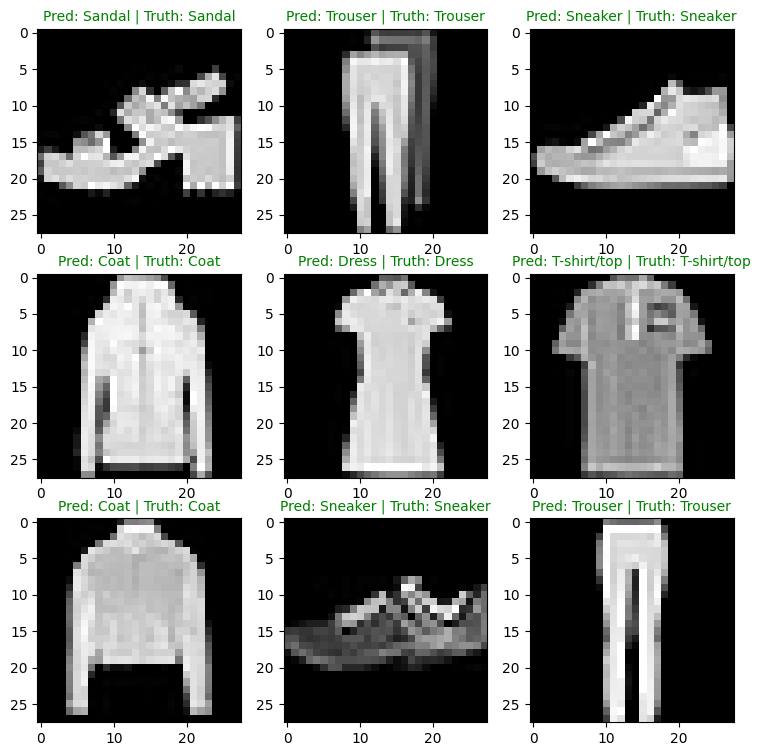

In [240]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    # Create a new subplot
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(sample.squeeze(), cmap='gray')
    # Find the prediction (in test form)
    pred_label = class_names[pred_classes[i]]

    truth_label = class_names[test_labels[i]]
    title_text = f'Pred: {pred_label} | Truth: {truth_label}'
    # Label as green if correct, red if wrong
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10,c='g')
    else:
        plt.title(title_text, fontsize=10,c='r')